####  The "length" of a quantum circuit is the primary factor when determining the magnitude of the errors in the resulting output distribution; quantum circuits with greater depth have decreased fidelity.

### 1. Understand a circuit with non-unitary operations.


In [1]:
from qiskit import *
import numpy as np
from qiskit.visualization import plot_histogram
import qiskit.tools.jupyter
import matplotlib.pyplot as plt

### Run the following cell and predict the outcome of the circuit.

Clbit(ClassicalRegister(2, 'c15'), 0)


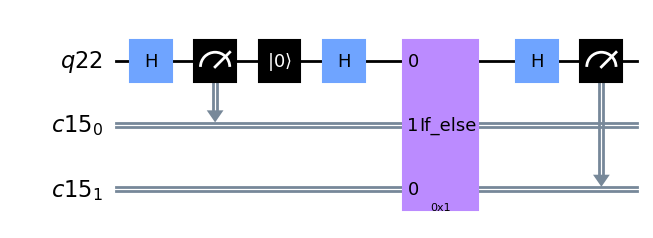

In [30]:
q = QuantumRegister(1)
c = ClassicalRegister(2)

qc0 = QuantumCircuit(q, c)
qc0.h(q[0])
qc0.measure(q[0], c[0])
qc0.reset(q[0])
qc0.h(q[0])
print(c[0])
with qc0.if_test((c,1)):
     qc0.p(np.pi/3, q[0])
qc0.h(q[0])
qc0.measure(q[0],c[1])

qc0.draw('mpl')

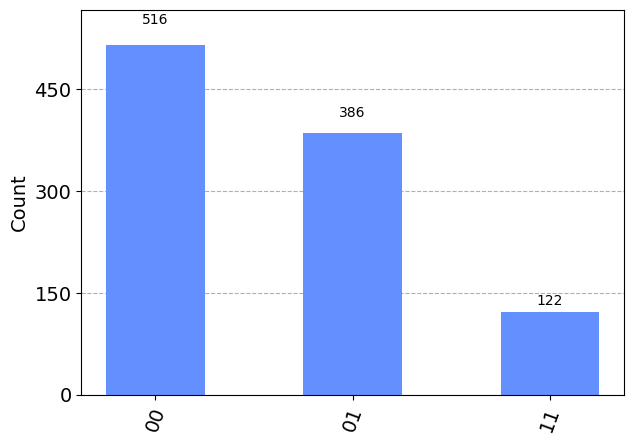

In [38]:
sim = Aer.get_backend('qasm_simulator')
count0 = sim.run(qc0).result().get_counts()
plot_histogram(count0)

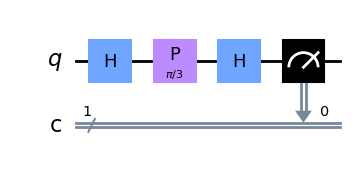

In [31]:
qc=QuantumCircuit(1,1)
qc.h(0)
qc.p(np.pi/3,0)
qc.h(0)
qc.measure(0,0)

qc.draw('mpl')

In [32]:
res=sim.run(qc).result()

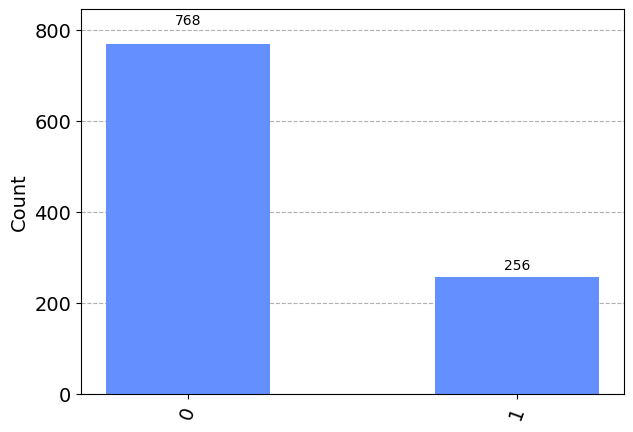

In [33]:
count=res.get_counts()
plot_histogram(count)

### Step B. Complete the rest of the circuit so that the auxiliary qubit ( top qubit ) after the reset would be in the state $\frac{1}{\sqrt{2}}(|0\rangle +e^{-i \frac{\pi}{2}}|1\rangle)$ if the value of the classical bit is one or remains zero state otherwise.


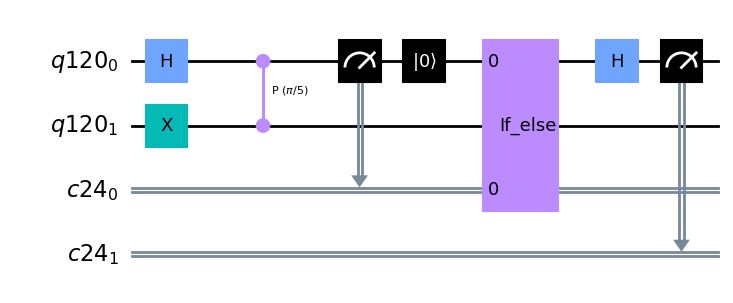

In [63]:
q = QuantumRegister(2)
c = ClassicalRegister(2)

qc1 = QuantumCircuit(q,c)
qc1.h(q[0])
qc1.x(q[1])
qc1.cp(np.pi/5, q[0], q[1])
qc1.measure(q[0], c[0])
qc1.reset(q[0])

###### your code goes here #####

with qc1.if_test((c[0],1)) :
    qc1.h(q[0])

    qc1.p(-np.pi/2,q[0])



##########################
qc1.h(q[0])
qc1.measure(q[0],c[1])

qc1.draw('mpl')

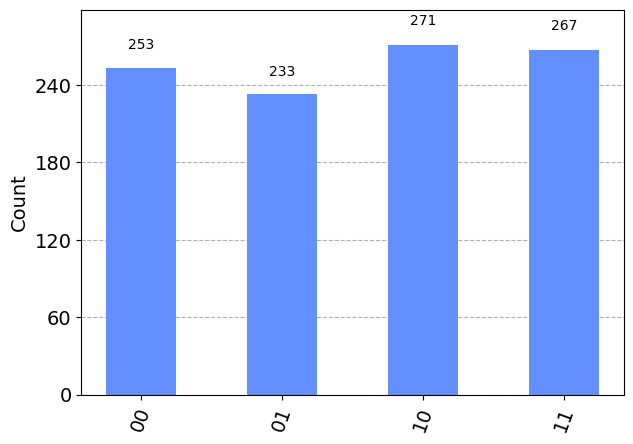

In [64]:
count=sim.run(qc1).result().get_counts()
plot_histogram(count)

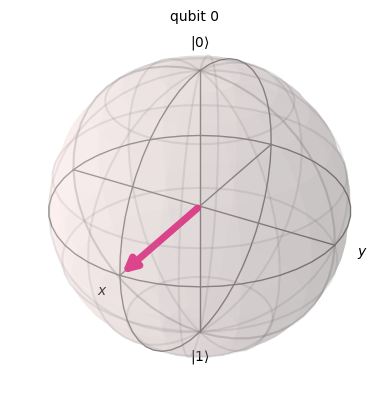

In [61]:
from qiskit.visualization import plot_bloch_multivector
qc=QuantumCircuit(1)

qc.h(0)
# qc.p(np.pi)
plot_bloch_multivector(qc)


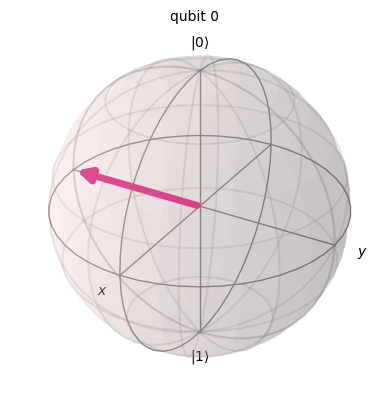

In [62]:
qc.p(-np.pi/2,0)
qc.mcp
plot_bloch_multivector(qc)

## Iterative Phase Estimation (IPE) Algorithm.

#### QPE is limited by the number of qubits necessary for the algorithm’s precision.Results  get worse as the number of the qubits on the circuit increases.

####  The IPE algorithm implements quantum phase estimation with only a single auxiliary qubit, and the accuracy of the algorithm is restricted by the number of iterations rather than the number of counting qubit 

#### Consider the problem of finding $\Phi$ given $\Psi$ and $U$ such that $U|\Psi\rangle=e^{i\phi}|\Psi\rangle$, with $\phi=2\pi\phi$ . 


####  Let's assume for now that $\phi$ can be written as 
### $\phi=\phi/2+\phi/4+\phi/8+\dots +\phi_m/2^m=0.\phi_1\phi_2\phi_3\dots \phi_m$

#### Assume that $U$ is a unitary operator acting on one qubit. We therefore need a system of two qubits, $q_0$and $q_1$, where $q_0$ is auxiliary qubit and the qubit $q_1$ represents the physical system on which $U$ operates. Having them initialized as $q_0\rightarrow|+\rangle$ and $q_1\rightarrow|\Psi\rangle$, application of control-U between $q_0$ and $q_1$ $2^t$ times would change the state of $q_0$ to $|0\rangle+e^{i2\pi 2^t\phi}|1\rangle$ . That is, the phase of $U$ has been kicked back into $q_0$ as many times as the control operation has been performed.

#### Therefore,

### fot $t=0,$ the pahse encoded into $q_0$ would be $e^{i2\pi 2^0\phi}=e^{i2\pi\phi}=e^{i2\pi0.\phi_1\phi_2\dots \phi_m}$

### fot $t=1$ the pahse  would be $e^{i2\pi 2^1\phi}=e^{i2\pi\phi_1}e^{i2\pi0.\phi_1\phi_2\dots \phi_m}$

### fot $t=2$ , $e^{i2\pi 2^2\phi}=e^{i2\pi2^{2-1}\phi_1}e^{i2\pi2^{1-1}\phi_2}e^{i2\pi0.\phi_1\phi_2\dots \phi_m}$

### fot $t=m-1$ , $e^{i2\pi 2^{m-1}\phi}=e^{i2\pi2^{m-1-1}\phi_1}e^{i2\pi2^{m-2-1}\phi_2}\dots e^{i2\pi2^{-1}\phi_m}=e^{i2\pi 0.\phi_m}$


#### Note for the last case with $t=m-1$ the state of $q_0$ is $|0\rangle+e^{i2\pi 0.\phi_m}|1\rangle$ 
### $|+\rangle$ if $\phi_m=0$ and $|-\rangle$ if $\phi_m=1$ which would produce outcomes $|0\rangle$ and $|1\rangle$ respectively when it gets measured in x-basis

## Step 1:
#### In this step we directly measure the least significant bit of the phase $\phi$, $\phi_m$ by initializing the 2-qubit registers as described above $(q_0\rightarrow|+\rangle)$ and $(q_1\rightarrow|\Psi\rangle)$,performing $2^{m-1}$ control-$U$ operations between the qubits and measuring $q_0$ in the x-basis


## Step 2

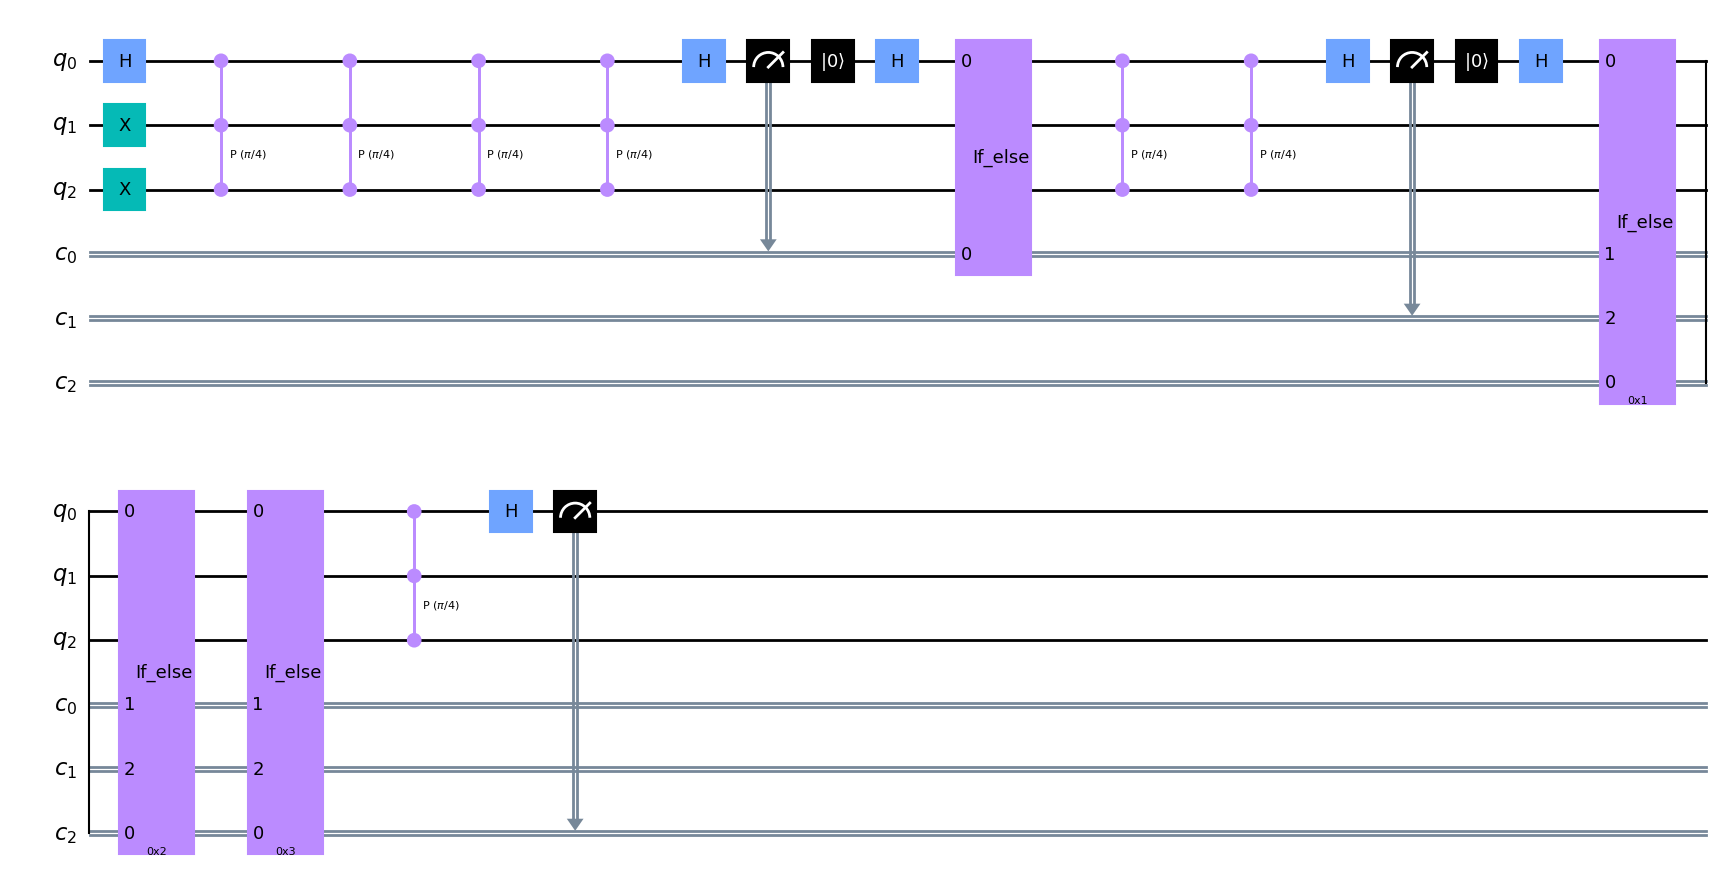

In [85]:
from qiskit import ClassicalRegister, QuantumCircuit, QuantumRegister
import numpy as np
def x_measurement(qc, qubit, cbit):
    qc.h(qubit)
    qc.measure(qubit, cbit)

def t_gate_ipe_circuit(qr: QuantumRegister, cr: ClassicalRegister) -> QuantumCircuit:
    # qr is a quantum register with 2 qubits
    # cr is a classical register with 3 bits

    qc = QuantumCircuit(qr, cr)

    ####### your code goes here #######
    qc.h(0)
    qc.x([1, 2])
    for _ in range(2 ** (3 - 1)):
        qc.mcp(np.pi/4, [0, 1], 2)
    x_measurement(qc, qr[0], cr[0])
    qc.reset(0)
    qc.h(0)
    with qc.if_test((cr[0],1)):
        qc.p(-np.pi/2, 0)

    for _ in range(2 ** (3 - 2)):
        qc.mcp(np.pi/4, [0, 1], 2)
    x_measurement(qc, qr[0], cr[1])
    qc.reset(0)

    qc.h(0)
    with qc.if_test((cr,1)):
        qc.p(-np.pi/4, 0)
    with qc.if_test((cr,2)):
        qc.p(-np.pi/2, 0)
    with qc.if_test((cr,3)):
        qc.p(-3*np.pi/2, 0)
    for _ in range(2 ** (3 - 3)):
        qc.mcp(np.pi/4, [0, 1], 2)
    qc.h(0)
    qc.measure(0, 2)

    return qc


qr = QuantumRegister(3, "q")
cr = ClassicalRegister(3, "c")
qc = QuantumCircuit(qr, cr)
qc = t_gate_ipe_circuit(qr, cr)
qc.draw("mpl")

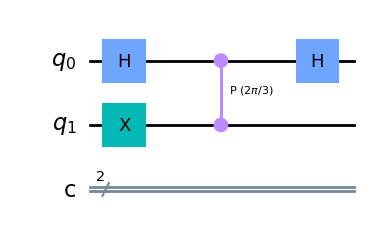

In [98]:
from qiskit import ClassicalRegister, QuantumCircuit, QuantumRegister
import numpy as np


def u_circuit(qr: QuantumRegister, cr: ClassicalRegister) -> QuantumCircuit:
    # qr is a quantum register with 2 qubits
    # cr is a classical register with 2 bits

    
    qc = QuantumCircuit(qr, cr)

    # Initialization
    q0, q1 = qr
    qc.h(q0)
    qc.x(q1)

    # Apply control-U operator as many times as needed to get the least significant phase bit
    u_angle = np.pi / 3
    k = 1
    cphase_angle = u_angle * 2**k
    qc.cp(cphase_angle, q0, q1)

    # Measure the auxiliary qubit in x-basis into the first classical bit
    qc.h(q0)
    c0, c1 = cr
    ccc=ClassicalRegister(1)
    qr1=QuantumRegister(1)
    qrr= QuantumCircuit(qr1,ccc)
    qrr.x(0)
    qrr.measure(0,ccc)
    c0=ccc
    # qc.measure(q0, c0)

    # # Reset and re-initialize the auxiliary qubit
    # qc.reset(q0)
    # qc.h(q0)
    

    return qc


qr = QuantumRegister(2, "q")
cr = ClassicalRegister(2, "c")
qc = QuantumCircuit(qr, cr)
qc = u_circuit(qr, cr)
qc.draw("mpl")

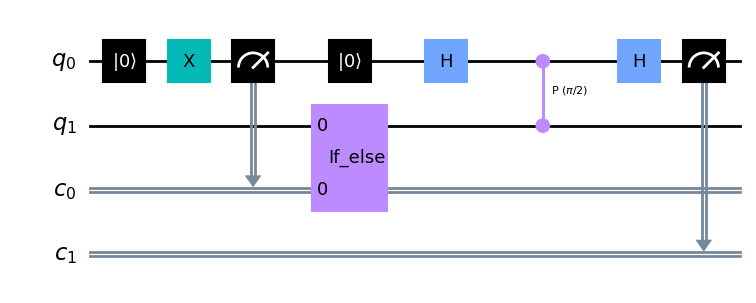

In [203]:
from qiskit import ClassicalRegister, QuantumCircuit, QuantumRegister
import numpy as np




def u_circuit(qr: QuantumRegister, cr: ClassicalRegister) -> QuantumCircuit:
    # qr is a quantum register with 2 qubits
    # cr is a classical register with 2 bits

    qc = QuantumCircuit(qr, cr)

    q0, q1 = qr
   
    c0, c1 = cr
    qc.reset(q0)
    qc.x(q0)
     
    qc.measure(q0, c0)

    # Reset and re-initialize the auxiliary qubit
    # qc.reset(q0)

    # qc.h(q0)

    # Apply phase correction conditioned on the first classical bit
   

   
    
    qc.reset(qr[0])
    qc.h(qr[0])
    with qc.if_test((cr[0],1)):
        qc.p(-np.pi/2,qr[1])
    
    qc.cp(np.pi/2,qr[0],qr[1])
    qc.h(qr[0])
    qc.measure(qr[0],c1)

    return qc


qr = QuantumRegister(2, "q")
cr = ClassicalRegister(2, "c")
qc = QuantumCircuit(qr, cr)
qc = u_circuit(qr, cr)
qc.draw("mpl")

In [204]:
from qiskit_aer import AerSimulator

sim = AerSimulator()
job = sim.run(qc, shots=1000)
result = job.result()
counts = result.get_counts()
print(counts)
success_probability = counts["01"] / counts.shots()
print(f"Success probability: {success_probability}")

{'01': 1000}
Success probability: 1.0


In [ ]:
   ccc=ClassicalRegister(1)
    qr1=QuantumRegister(1)
    qrr= QuantumCircuit(qr1,ccc)
    qrr.x(0)
    qrr.measure(0,ccc)
    c0=ccc